In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
%matplotlib inline

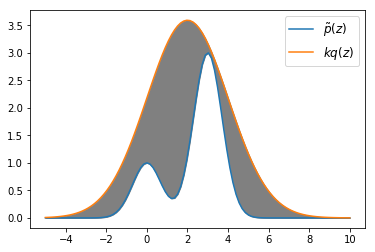

In [2]:
def func(x):
    return np.exp(-x ** 2) + 3 * np.exp(-(x - 3) ** 2)
x = np.linspace(-5, 10, 100)

k = 18
rv = norm(2, 2)
plt.plot(x, func(x), label=r"$\tilde{p}(z)$")
plt.plot(x, k * rv.pdf(x), label=r"$kq(z)$")
plt.fill_between(x, func(x), k * rv.pdf(x), color="gray")
plt.legend(fontsize=12)
plt.show()

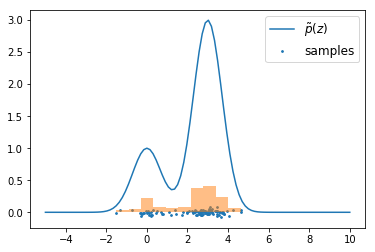

In [3]:
n = 100

samples = []
while len(samples) < n:
    sample_candidate = rv.rvs()
    accept_proba = func(sample_candidate) / (k * rv.pdf(sample_candidate))
    if np.random.uniform(0, 1) < accept_proba:
        samples.append(sample_candidate)
samples = np.asarray(samples)

plt.plot(x, func(x), label=r"$\tilde{p}(z)$")
plt.hist(samples, density=True, alpha=0.5)
plt.scatter(samples, np.random.normal(scale=.03, size=(n, 1)), s=3, label="samples")
plt.legend(fontsize=12)
plt.show()